In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from deap import base, creator, tools, algorithms

In [36]:
data = pd.read_csv("Datasets/Breast Cancer Wisconsin/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [38]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [39]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [40]:
# Удалим столбец id и 'Unnamed: 32', поскольку он содержит только значения NaN
data = data.drop(columns=['id', 'Unnamed: 32'], axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
data.shape

(569, 31)

In [42]:
data.duplicated().sum()

0

In [43]:
# Сопоставим диагноз с 0 (доброкачественный) и 1 (злокачественный)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [44]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [45]:
# Разделим данные на обучающие, валидационные и тестовые наборы
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Определим функции генетического алгоритма

In [46]:
def evaluate(individual, X_train, y_train, X_val, y_val):
    # Объединим массивы в отдельный список
    combined_individual = np.concatenate(
        [np.expand_dims(arr, axis=0) if len(arr.shape) == 1 else arr for arr in individual])

    # Изменим форму в соответствии с количеством столбцов в X
    combined_individual = combined_individual.reshape(-1, X_train.shape[1])

    # Создадим маску, основанную на генах индивидуума
    mask = np.array(combined_individual, dtype=bool)

    # Выберите объекты с помощью маски
    X_train_selected = X_train.iloc[:, mask]
    X_val_selected = X_val.iloc[:, mask]

    # Обучим классификатор случайного леса
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_selected, y_train)

    # Сделаем прогнозы на основе валидационного набора
    y_val_pred = clf.predict(X_val_selected)

    # Вычислим точность по набору проверки
    accuracy_val = accuracy_score(y_val, y_val_pred)

    return accuracy_val,

# Настройка генетического алгоритма

In [47]:
# Определение класса FitnessMax для максимизации значения функции приспособленности
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# Определение класса Individual для представления индивида в генетическом алгоритме
creator.create("Individual", list, fitness=creator.FitnessMax)

# Инициализация инструментов для создания генетического алгоритма
toolbox = base.Toolbox()

# Регистрация функции для генерации случайного булева значения (0 или 1) для каждого признака
toolbox.register("attr_bool", np.random.choice, [0, 1], size=X.shape[1])

# Регистрация функции для создания индивида с использованием случайных булевых значений
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X.shape[1])

# Регистрация функции для создания популяции индивидов
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Регистрация функции для оценки приспособленности индивида
toolbox.register("evaluate", evaluate, X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val)

# Регистрация функций для кроссовера и мутации
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

# Регистрация функции для выбора индивидов для следующего поколения
toolbox.register("select", tools.selTournament, tournsize=3)


C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Admin\PycharmProjects\100DaysOfDataScience\venv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


# Генетический алгоритм

In [48]:
population_size = 10
crossover_prob = 0.8
mutation_prob = 0.2
generations = 5

In [49]:
population = toolbox.population(n=population_size)

In [50]:
# Будем отслеживать статистику в процессе эволюции
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

# Запустим генетический алгоритм

In [51]:
population, logbook = algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=2, cxpb=crossover_prob,
                                                mutpb=mutation_prob, ngen=generations, stats=stats, halloffame=None,
                                                verbose=True)

gen	nevals	avg     	min     	max     
0  	10    	0.964706	0.964706	0.964706
1  	2     	0.964706	0.964706	0.964706
2  	2     	0.964706	0.964706	0.964706


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [52]:
# Выделим лучшего индивидуума
best_individual = tools.selBest(population, k=1)[0]

In [53]:
# Оценим лучшего индивида в тестовом наборе
best_mask = np.array(best_individual, dtype=bool)
X_test_selected = X_test.iloc[:, best_mask]

In [55]:
# Обучим классификатор случайного леса выбранным признакам
best_clf = RandomForestClassifier(random_state=42)
best_clf.fit(X_train.iloc[:, best_mask], y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Сделаем прогнозы на основе тестового набора
y_pred_test = best_clf.predict(X_test_selected)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

In [58]:
print(f"Best Individual: {best_individual}")
print("-" * 30)
print(f"Accuracy : {accuracy_test}")
print("-" * 30)
print("Classification Report:")
print(classification_rep)

Best Individual: [array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0]), array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1]), array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1]), array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0]), array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0]), array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0]), array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1]), array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1]), array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0]), array([1, 1, 0, 0, 1, 1, 0, 

In [59]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[58  2]
 [ 2 24]]


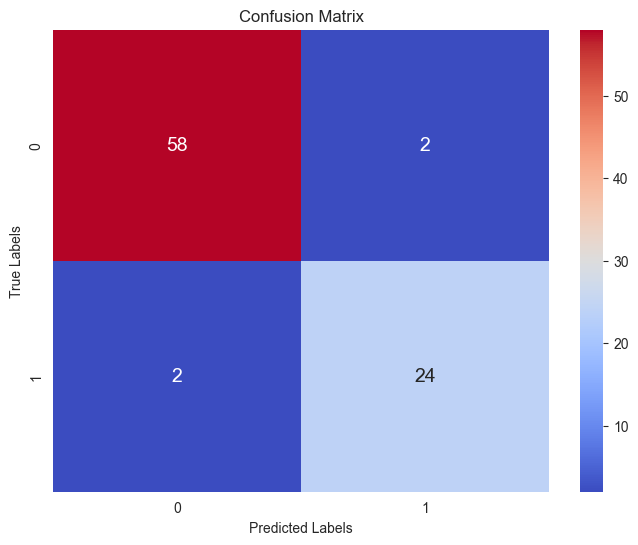

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=True, annot_kws={"size": 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()